# What the F is this about?

This is the simplest siamese network to be in existence.
It compares if two numbers are of same sign.


If they are of same signs (+, +) or (-, -), it will give you high score.

Else low.
## References
https://colab.research.google.com/drive/1FsixLon5Zz3_rFA0xIHzc8Tvnnw8FLr8#scrollTo=6aUJOhkrFfu9

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30,25)

In [2]:
import torch
import torch.utils.data as utils
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
from torch.autograd import Variable

In [3]:
import torch.nn as nn

# Number Pair Dataset

In [4]:
import random

In [6]:
class SiameseNetworkSimplestDataset(Dataset):
    def __init__(self, minval=-100, maxval=100, npairs=1000):
        self.minval = minval
        self.maxval = maxval
        self.data = []

        # positive pairs
        for i in range(npairs//2):
            num1 = random.randint(1, self.maxval)
            num2 = random.randint(1, self.maxval)
            self.data.append((num1, num2, 1))
        for i in range(npairs//2):
            num1 = random.randint(self.minval, -1)
            num2 = random.randint(self.minval, -1)
            self.data.append((num1, num2, 1))

        # negative pairs
        for i in range(npairs//2):
            num1 = random.randint(1, self.maxval)
            num2 = random.randint(self.minval, -1)
            self.data.append((num1, num2, 0))
        for i in range(npairs//2):
            num1 = random.randint(1, self.maxval)
            num2 = random.randint(self.minval, -1)
            self.data.append((num2, num1, 0))

        random.shuffle(self.data)
        self.data = list(map(lambda x: (np.array([x[0]], dtype=np.float32), np.array([x[1]], dtype=np.float32), x[2]), self.data))

    @property
    def npairs(self):
        return len(self.data)

    def __len__(self):
        return self.npairs

    def __getitem__(self, index):
        return self.data[index]

In [7]:
simplest_dataset = SiameseNetworkSimplestDataset(npairs=1000)

In [8]:
simplest_dataset[5]

(array([24.], dtype=float32), array([15.], dtype=float32), 1)

In [9]:
simplest_dataset[:6]

[(array([-9.], dtype=float32), array([-72.], dtype=float32), 1),
 (array([-9.], dtype=float32), array([-67.], dtype=float32), 1),
 (array([-88.], dtype=float32), array([-83.], dtype=float32), 1),
 (array([95.], dtype=float32), array([-70.], dtype=float32), 0),
 (array([-76.], dtype=float32), array([-65.], dtype=float32), 1),
 (array([24.], dtype=float32), array([15.], dtype=float32), 1)]

In [10]:
simplest_dataloader = DataLoader(simplest_dataset, shuffle=True, batch_size=4)

# ANN Siamese Network

In [11]:
class SiameseNetwork(torch.nn.Module):
    def __init__(self, input_dim=2):
        super(SiameseNetwork, self).__init__()
             # Defining the fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(1, 4),
            nn.ReLU(inplace=True),

            # nn.Linear(4, 8),
            # nn.ReLU(inplace=True),

            # nn.Linear(8, 4),
            # nn.ReLU(inplace=True),

            nn.Linear(4, 3)
        )

    def forward_once(self, x):
        return self.fc1(x)

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

In [12]:
model = SiameseNetwork()

In [13]:
# torch.Tensor(1)

In [14]:
# model.forward_once(torch.Tensor(1))

# Training

In [15]:
# Load the dataset as pytorch tensors using dataloader
train_dataloader = DataLoader(simplest_dataset,
                        shuffle=True,
                        num_workers=4,
                        batch_size=16)

In [17]:
# Check whether you have GPU is loaded or not
torch.cuda.is_available()

False

In [18]:
# Declare Siamese Network
net = SiameseNetwork()
# Decalre Loss Function
criterion = nn.CosineEmbeddingLoss()
# criterion = nn.CosineSimilarity()
# Declare Optimizer
optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-4, alpha=0.99, eps=1e-8, weight_decay=0.0005, momentum=0.9)

In [19]:
counter = []
loss_history = [] 
iteration_number= 0
epochs = 50
for epoch in range(0, epochs):
    for i, data in enumerate(train_dataloader, 0):
        num1, num2, label = data
        optimizer.zero_grad()
        output1, output2 = net(num1, num2)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %100 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

Epoch number 0
 Current loss 8.460879325866699e-05

Epoch number 0
 Current loss 0.0003820881247520447

Epoch number 1
 Current loss 0.00016486644744873047

Epoch number 1
 Current loss 3.296881914138794e-05

Epoch number 2
 Current loss 7.136538624763489e-05

Epoch number 2
 Current loss 3.56137752532959e-06

Epoch number 3
 Current loss 2.0779669284820557e-05

Epoch number 3
 Current loss 7.327646017074585e-06

Epoch number 4
 Current loss 3.1441450119018555e-06

Epoch number 4
 Current loss 7.815659046173096e-06

Epoch number 5
 Current loss 3.6135315895080566e-07

Epoch number 5
 Current loss 1.119077205657959e-05

Epoch number 6
 Current loss 7.82310962677002e-08

Epoch number 6
 Current loss 1.862645149230957e-08

Epoch number 7
 Current loss 4.041939973831177e-06

Epoch number 7
 Current loss 5.327165126800537e-07

Epoch number 8
 Current loss 6.444752216339111e-07

Epoch number 8
 Current loss 2.2351741790771484e-08

Epoch number 9
 Current loss 5.289912223815918e-07

Epoch num

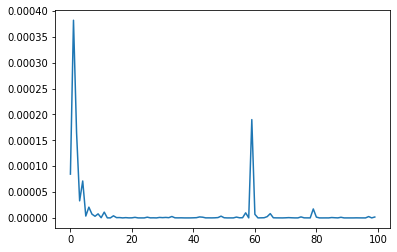

In [20]:
plt.plot(loss_history)

# Test

We get the embedding for each input number and compare their similarity using cosine similarity metric.

In [25]:
# both negative -> score should be high
num1 = np.array([-1], dtype=np.float32)
num2 = np.array([-1], dtype=np.float32)
num1 = torch.from_numpy(num1)
num2 = torch.from_numpy(num2)

out1, out2 = net(num1, num2)
print(out1, out2)
nn.CosineSimilarity(dim=0)(out1, out2)

tensor([ 0.0573,  0.0212, -0.0590], grad_fn=<AddBackward0>) tensor([ 0.0573,  0.0212, -0.0590], grad_fn=<AddBackward0>)


tensor(1., grad_fn=<DivBackward0>)

In [26]:
# -ve, +ve
num1 = np.array([-99], dtype=np.float32)
num2 = np.array([200], dtype=np.float32)
num1 = torch.from_numpy(num1)
num2 = torch.from_numpy(num2)

out1, out2 = net(num1, num2)
print(out1, out2)
nn.CosineSimilarity(dim=0)(out1, out2)

tensor([ 0.0574,  0.0212, -0.0590], grad_fn=<AddBackward0>) tensor([-8.7502, -3.8573,  9.8610], grad_fn=<AddBackward0>)


tensor(-0.9985, grad_fn=<DivBackward0>)

In [27]:
# +ve, -ve
num1 = np.array([5], dtype=np.float32)
num2 = np.array([-200], dtype=np.float32)
num1 = torch.from_numpy(num1)
num2 = torch.from_numpy(num2)

out1, out2 = net(num1, num2)
print(out1, out2)
nn.CosineSimilarity(dim=0)(out1, out2)

tensor([-0.2001, -0.0922,  0.2310], grad_fn=<AddBackward0>) tensor([ 0.0574,  0.0212, -0.0590], grad_fn=<AddBackward0>)


tensor(-0.9976, grad_fn=<DivBackward0>)

In [28]:
# +ve, +ve
num1 = np.array([11], dtype=np.float32)
num2 = np.array([42], dtype=np.float32)
num1 = torch.from_numpy(num1)
num2 = torch.from_numpy(num2)

out1, out2 = net(num1, num2)
print(out1, out2)
nn.CosineSimilarity(dim=0)(out1, out2)

tensor([-0.4632, -0.2081,  0.5273], grad_fn=<AddBackward0>) tensor([-1.8224, -0.8066,  2.0582], grad_fn=<AddBackward0>)


tensor(1.0000, grad_fn=<DivBackward0>)